<a href="https://colab.research.google.com/github/natalrhyme/eCommerce-Transactions-dataset/blob/main/Rishabh_sangwan_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

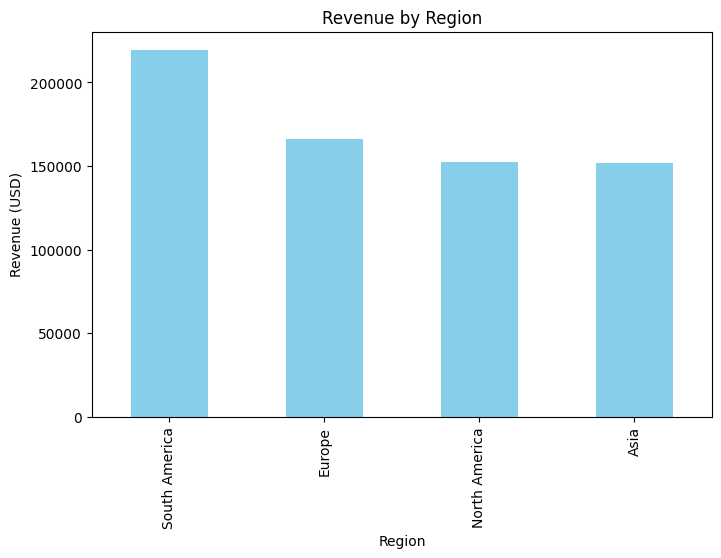

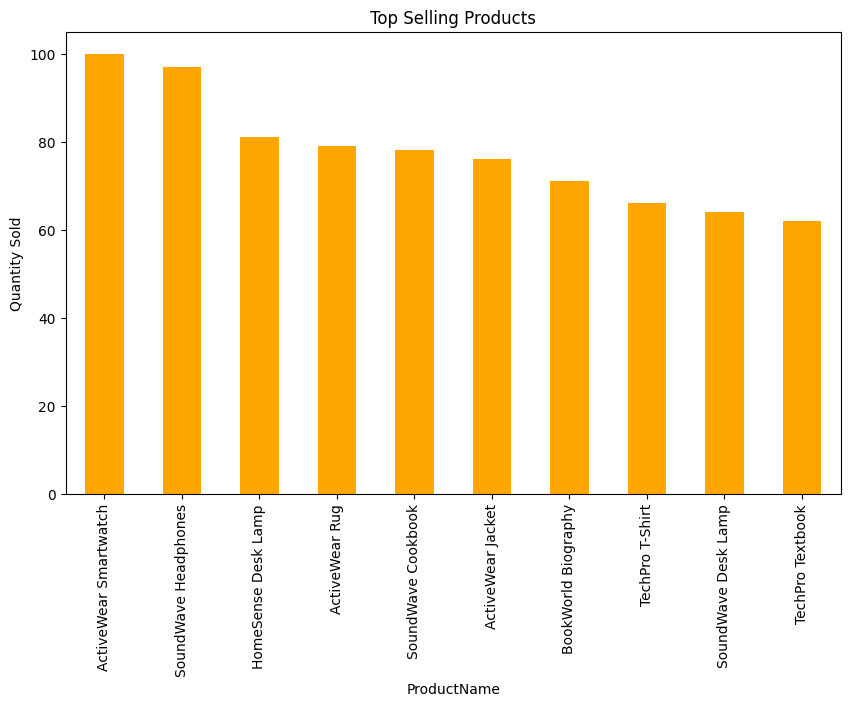

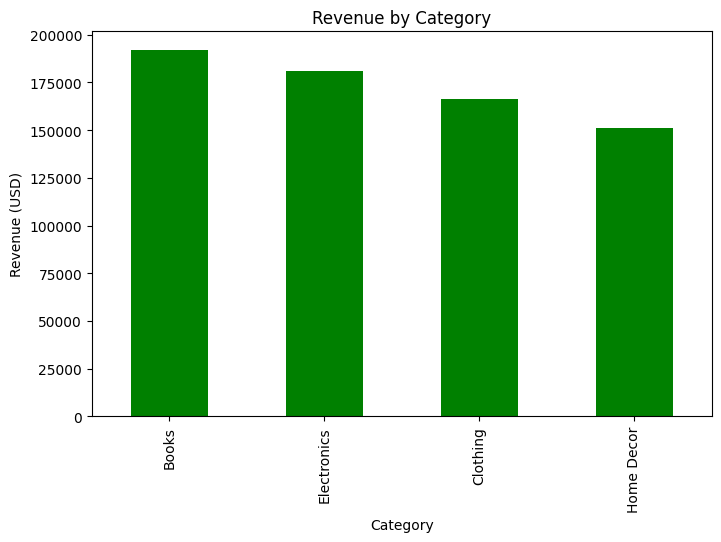

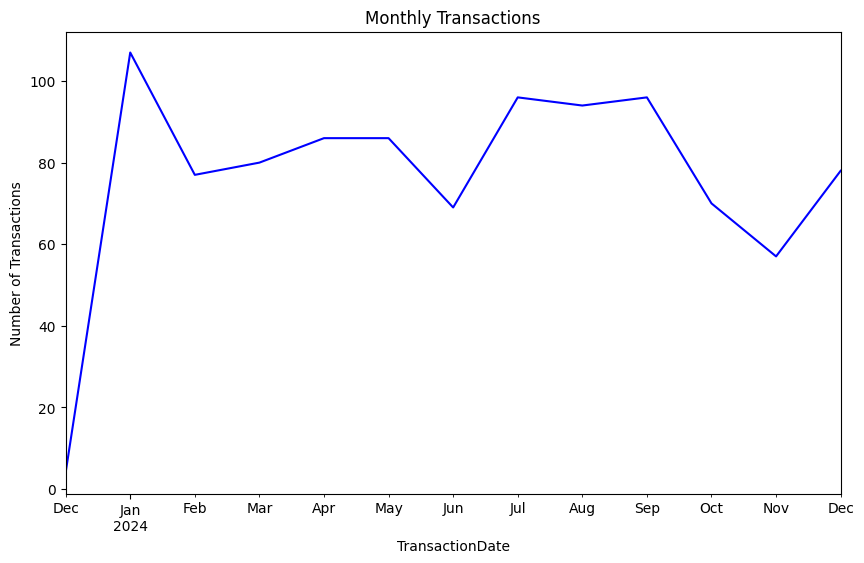

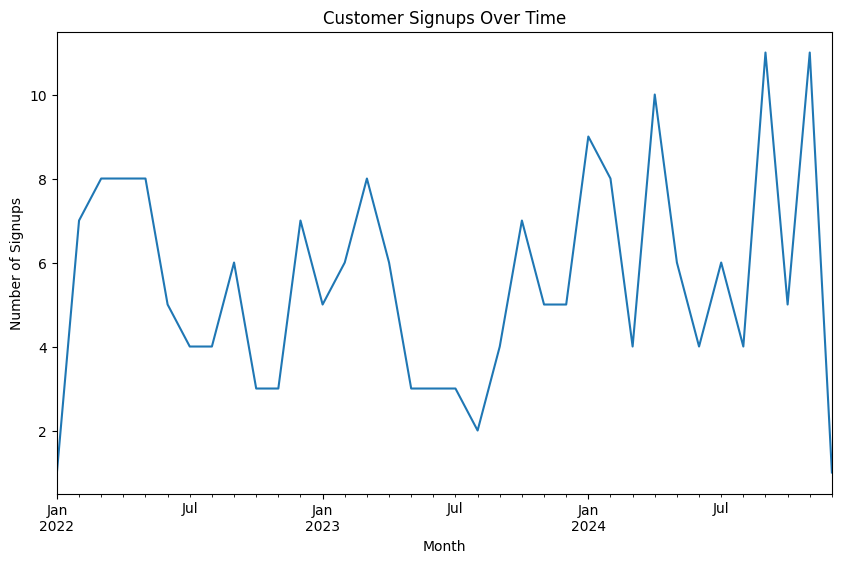

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

merged_data = transactions.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")

merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])

merged_data["Revenue"] = merged_data["TotalValue"]

# Exploratory Data Analysis
# 1. Revenue by Region
region_revenue = merged_data.groupby("Region")["Revenue"].sum().sort_values(ascending=False)
region_revenue.plot(kind="bar", title="Revenue by Region", figsize=(8, 5), color="skyblue")
plt.ylabel("Revenue (USD)")
plt.show()

# 2. Top Selling Products
product_sales = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
product_sales.plot(kind="bar", title="Top Selling Products", figsize=(10, 6), color="orange")
plt.ylabel("Quantity Sold")
plt.show()

# 3. Revenue by Category
category_revenue = merged_data.groupby("Category")["Revenue"].sum().sort_values(ascending=False)
category_revenue.plot(kind="bar", title="Revenue by Category", figsize=(8, 5), color="green")
plt.ylabel("Revenue (USD)")
plt.show()

# 4. Monthly Transactions
monthly_transactions = merged_data.set_index("TransactionDate").resample("ME")["TransactionID"].count()
monthly_transactions.plot(title="Monthly Transactions", figsize=(10, 6), color="blue")
plt.ylabel("Number of Transactions")
plt.show()

# 5. Customer Acquisition Trends
plt.figure(figsize=(10, 6))
customers["SignupDate"].dt.to_period("M").value_counts().sort_index().plot(kind="line")
plt.title("Customer Signups Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.show()

